<a href="https://colab.research.google.com/github/PriyanshuR23/Industrial_IOT_Predictive_Maintenance/blob/main/Industrial_IOT_Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Load dataset from GitHub
url = "https://media.githubusercontent.com/media/somjit101/Predictive-Maintenance-Industrial-IOT/refs/heads/main/sensor.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()

,ID,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,machine_status,timestamp
0,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:00
1,2,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:01
2,3,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,01-04-18 0:02
3,4,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,01-04-18 0:03
4,5,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,01-04-18 0:04


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220313 entries, 0 to 220312
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              220313 non-null  int64  
 1   sensor_00       210105 non-null  float64
 2   sensor_01       219944 non-null  float64
 3   sensor_02       220294 non-null  float64
 4   sensor_03       220294 non-null  float64
 5   sensor_04       220294 non-null  float64
 6   sensor_05       220294 non-null  float64
 7   sensor_06       215515 non-null  float64
 8   sensor_07       214862 non-null  float64
 9   sensor_08       215206 non-null  float64
 10  sensor_09       215718 non-null  float64
 11  sensor_10       220294 non-null  float64
 12  sensor_11       220294 non-null  float64
 13  sensor_12       220294 non-null  float64
 14  sensor_13       220294 non-null  float64
 15  sensor_14       220292 non-null  float64
 16  sensor_15       220282 non-null  float64
 17  sensor_16 

,0
ID,0
sensor_00,10208
sensor_01,369
sensor_02,19
sensor_03,19
sensor_04,19
sensor_05,19
sensor_06,4798
sensor_07,5451
sensor_08,5107


In [4]:

df_cleaned = df.dropna()


numerical_features = df.select_dtypes(include=['number'])


df[numerical_features.columns] = df[numerical_features.columns].fillna(numerical_features.mean())

In [5]:
# Check for duplicate rows
df.duplicated().sum()

# Remove duplicates if necessary
df.drop_duplicates(inplace=True)

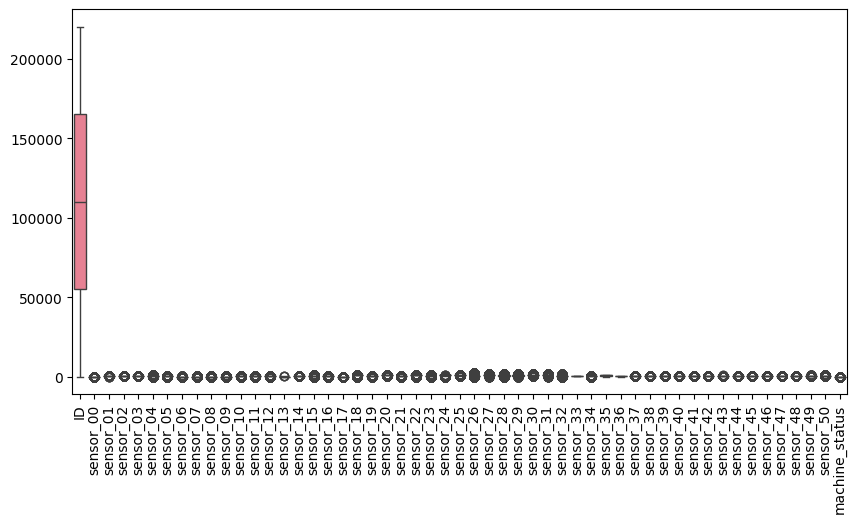

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [7]:
from scipy import stats


# Remove outliers using Z-score (keeping only values within 3 standard deviations)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

In [12]:
!git clone https://github.com/somjit101/Predictive-Maintenance-Industrial-IOT.git
%cd Predictive-Maintenance-Industrial-IOT

Cloning into 'Predictive-Maintenance-Industrial-IOT'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 21 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 2.25 MiB | 11.59 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Filtering content: 100% (2/2), 214.57 MiB | 34.77 MiB/s, done.
/content/Predictive-Maintenance-Industrial-IOT


In [13]:
%cd /content/Predictive-Maintenance-Industrial-IOT/Sensor_Data_EDA

/content/Predictive-Maintenance-Industrial-IOT/Sensor_Data_EDA


In [14]:
!jupyter nbconvert --to notebook --execute Sensor_EDA.ipynb --output executed_EDA.ipynb

[NbConvertApp] Converting notebook Sensor_EDA.ipynb to notebook
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] Writing 894662 bytes to executed_EDA.ipynb


In [15]:
import nbformat

# Load the executed notebook
with open("executed_EDA.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

# Extract and print outputs
for cell in nb.cells:
    if 'outputs' in cell:
        for output in cell['outputs']:
            if 'text' in output:
                print(output['text'])

<ipython-input-4-999799f1adfc>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  sensor_data_5T = sensor_data.drop(columns = ['Unnamed: 0', 'ID', 'machine_status']).resample('5T', on = 'timestamp').mean().dropna()

<ipython-input-4-999799f1adfc>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  sensor_data_10T = sensor_data.drop(columns = ['Unnamed: 0', 'ID', 'machine_status']).resample('10T', on = 'timestamp').mean().dropna()



In [16]:
!jupyter nbconvert --to markdown --execute Sensor_EDA.ipynb --output executed_EDA.mb

[NbConvertApp] Converting notebook Sensor_EDA.ipynb to markdown
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] Support files will be in executed_EDA.mb_files/
[NbConvertApp] Making directory executed_EDA.mb_files
[NbConvertApp] Writing 59183 bytes to executed_EDA.mb.md


In [17]:
import os
!ls -lh

total 118M
-rw-r--r-- 1 root root 874K Feb 18 17:47 executed_EDA.ipynb
drwxr-xr-x 2 root root 4.0K Feb 18 17:48 executed_EDA.mb_files
-rw-r--r-- 1 root root  58K Feb 18 17:48 executed_EDA.mb.md
-rwxr-xr-x 1 root root 1.5M Feb 18 17:46 Repair_Sensor_Deviations.xlsm
-rw-r--r-- 1 root root 115M Feb 18 17:47 sensor_data_DateTime.csv
-rw-r--r-- 1 root root 554K Feb 18 17:46 Sensor_EDA.ipynb


In [18]:
# Assuming raw data was loaded from Sensor.csv
%cd /content/Predictive-Maintenance-Industrial-IOT
raw_data = pd.read_csv("sensor.csv")

# Check if the columns exist before dropping
if 'Unnamed: 0' in raw_data.columns and 'ID' in raw_data.columns:
    # Sample preprocessing: Drop unnecessary columns and handle missing values
    cleaned_data = raw_data.drop(columns=['Unnamed: 0', 'ID']).dropna()
else:
    print("Warning: 'Unnamed: 0' or 'ID' column not found. Skipping drop.")
    cleaned_data = raw_data.dropna()

# Save cleaned data for future use
cleaned_data.to_csv("sensor_data_cleaned.csv", index=False)

# Display first few rows
cleaned_data.head()

/content/Predictive-Maintenance-Industrial-IOT


,ID,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,machine_status,timestamp
0,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:00
1,2,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:01
2,3,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,01-04-18 0:02
3,4,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,01-04-18 0:03
4,5,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,01-04-18 0:04


In [19]:
# Load the cleaned dataset (update filename if different)
cleaned_data = pd.read_csv("sensor_data_cleaned.csv")

# Display basic info about the dataset
print(cleaned_data.info())

# Display first 5 rows
cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119098 entries, 0 to 119097
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              119098 non-null  int64  
 1   sensor_00       119098 non-null  float64
 2   sensor_01       119098 non-null  float64
 3   sensor_02       119098 non-null  float64
 4   sensor_03       119098 non-null  float64
 5   sensor_04       119098 non-null  float64
 6   sensor_05       119098 non-null  float64
 7   sensor_06       119098 non-null  float64
 8   sensor_07       119098 non-null  float64
 9   sensor_08       119098 non-null  float64
 10  sensor_09       119098 non-null  float64
 11  sensor_10       119098 non-null  float64
 12  sensor_11       119098 non-null  float64
 13  sensor_12       119098 non-null  float64
 14  sensor_13       119098 non-null  float64
 15  sensor_14       119098 non-null  float64
 16  sensor_15       119098 non-null  float64
 17  sensor_16 

,ID,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,machine_status,timestamp
0,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:00
1,2,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:01
2,3,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,01-04-18 0:02
3,4,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,01-04-18 0:03
4,5,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,01-04-18 0:04


In [20]:
cleaned_data['timestamp'] = pd.to_datetime(cleaned_data['timestamp'], format='%d-%m-%y %H:%M', errors='coerce')

In [21]:
cleaned_data['hour'] = cleaned_data['timestamp'].dt.hour
cleaned_data['day_of_week'] = cleaned_data['timestamp'].dt.dayofweek

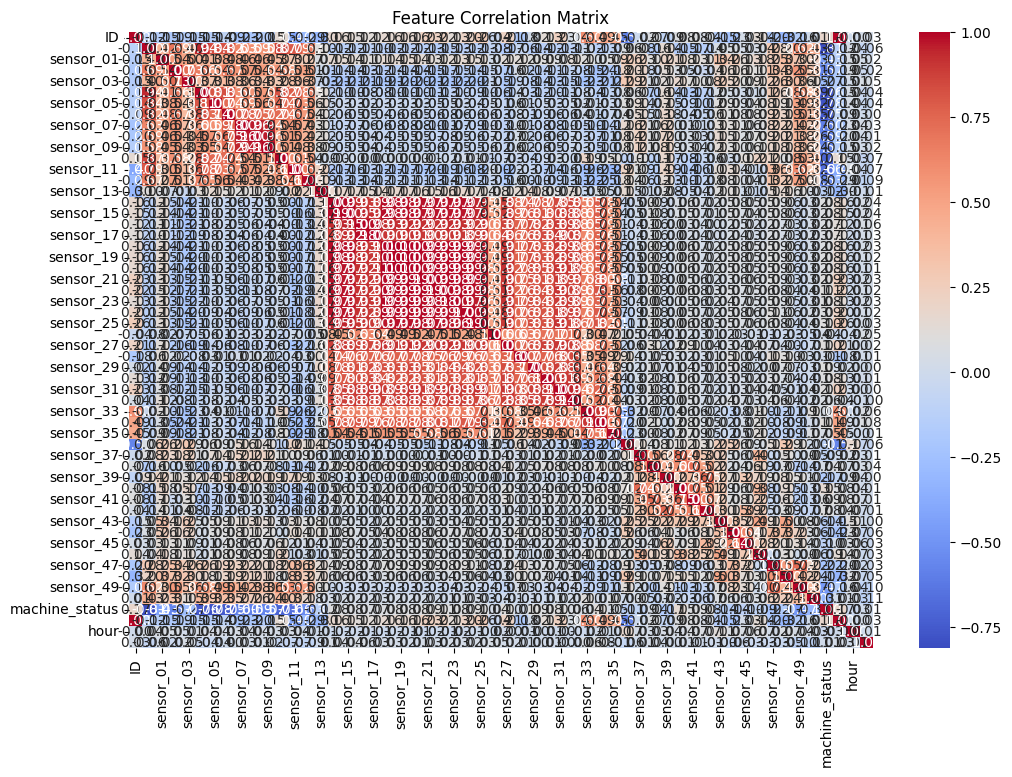

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = cleaned_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

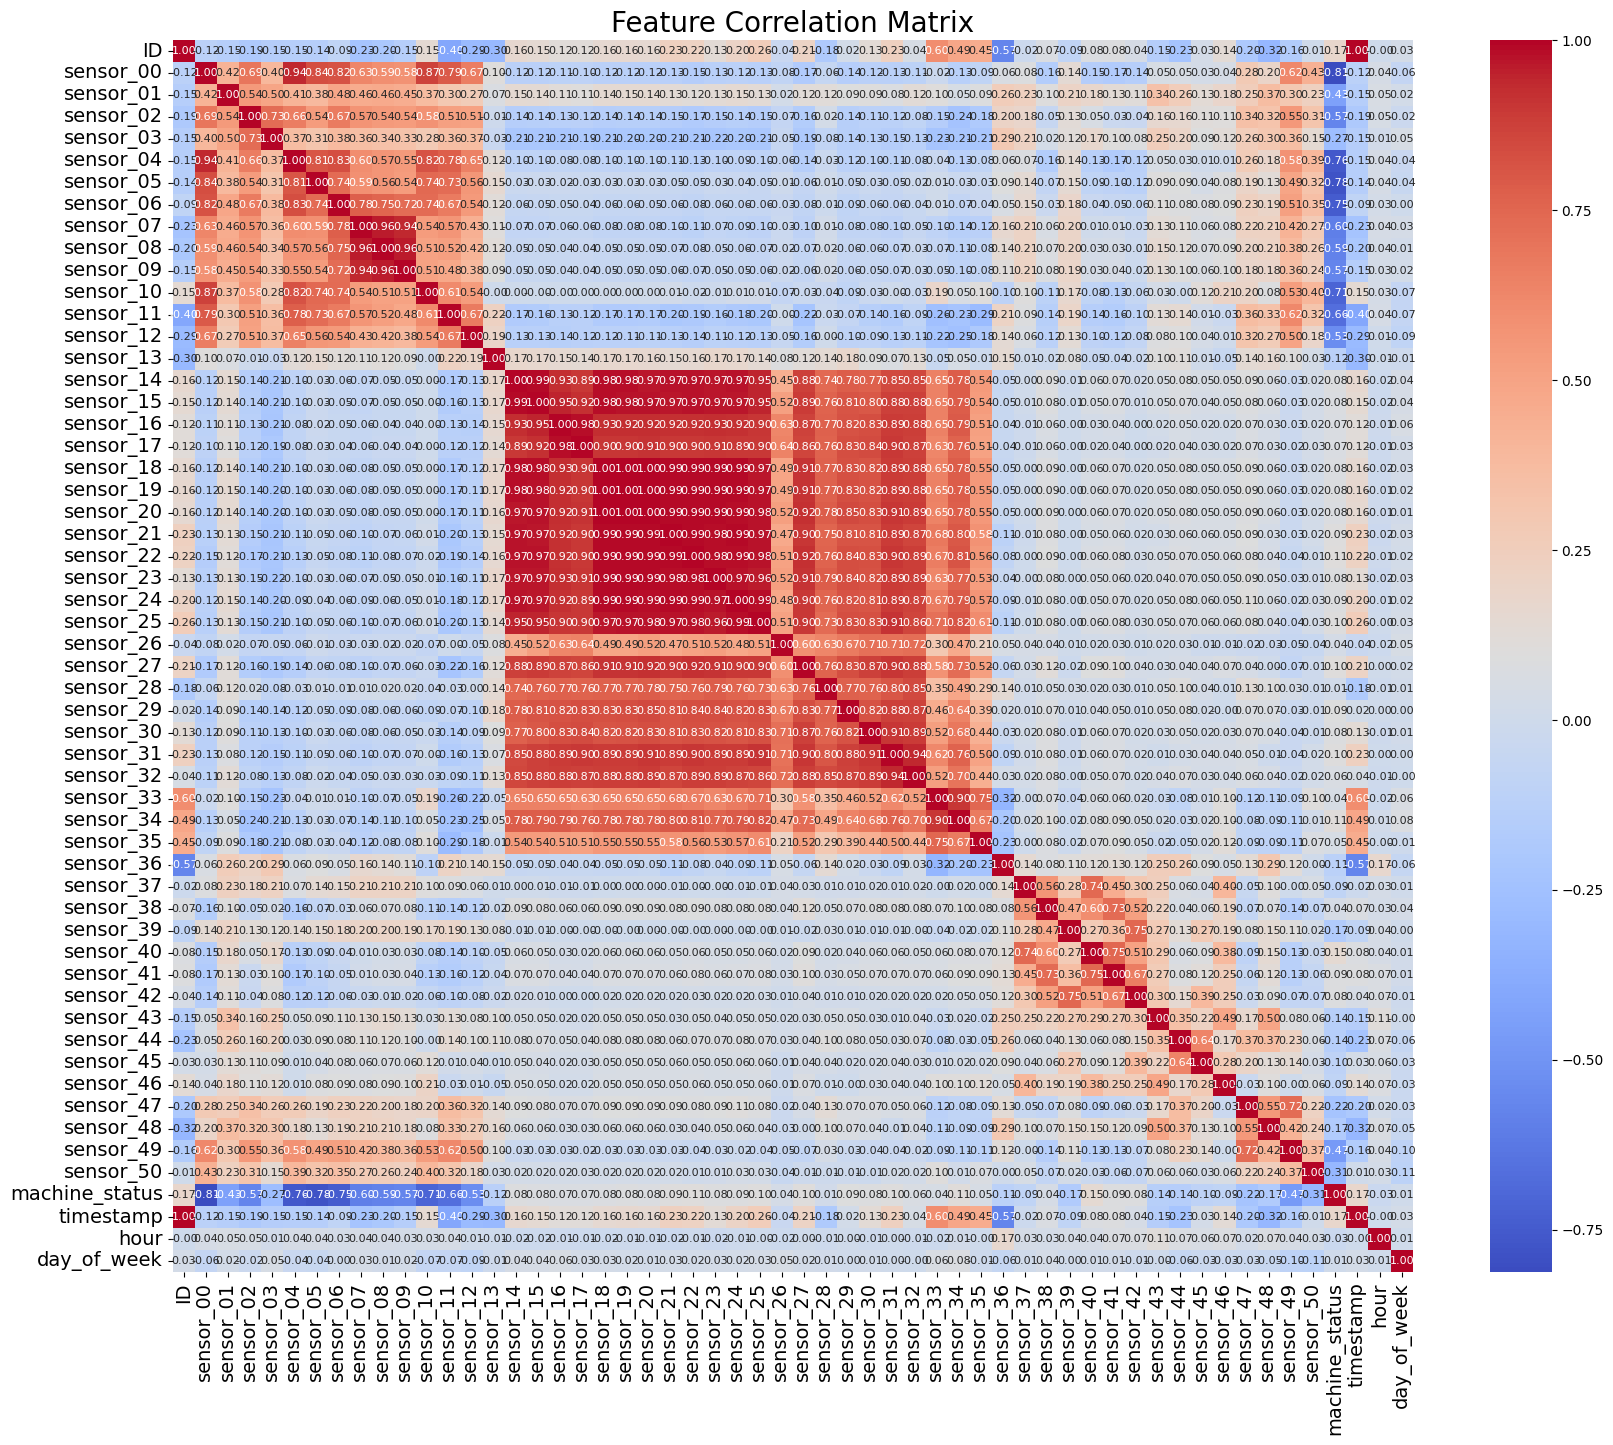

In [23]:
# Compute correlation matrix
corr_matrix = cleaned_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})  # Keep font size for annotations small
plt.title("Feature Correlation Matrix", fontsize=20)  # Increase font size for title
plt.xticks(fontsize=14)  # Increase font size for x-axis labels
plt.yticks(fontsize=14)  # Increase font size for y-axis labels
plt.show()

In [24]:
# Find absolute correlations with target variable (e.g., machine_status)
target = 'machine_status'  # Update based on actual failure column
correlations = corr_matrix[target].abs().sort_values(ascending=False)

# Select top features (excluding the target itself)
important_features = correlations[1:6].index.tolist()
print("Selected Features:", important_features)

Selected Features: ['sensor_00', 'sensor_05', 'sensor_04', 'sensor_06', 'sensor_10']


In [25]:
# Find absolute correlations with target variable (e.g., machine_status)
target = 'machine_status'  # Update based on actual failure column
correlations = corr_matrix[target].abs().sort_values(ascending=False)

# Select top features (excluding the target itself)
important_features = correlations[1:11].index.tolist()
print("Selected Features:", important_features)

Selected Features: ['sensor_00', 'sensor_05', 'sensor_04', 'sensor_06', 'sensor_10', 'sensor_11', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_02']


In [26]:
# Find absolute correlations with target variable (e.g., machine_status)
target = 'machine_status'  # Update based on actual failure column
correlations = corr_matrix[target].abs().sort_values(ascending=False)

# Select top features (excluding the target itself)
important_features = correlations[1:6].index.tolist()
print("Selected Features:", important_features)

Selected Features: ['sensor_00', 'sensor_05', 'sensor_04', 'sensor_06', 'sensor_10']


In [27]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = cleaned_data[important_features]
y = cleaned_data[target]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (95278, 5)
Test Data Shape: (23820, 5)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9980268681780017
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23236
           1       0.97      0.95      0.96       584

    accuracy                           1.00     23820
   macro avg       0.99      0.97      0.98     23820
weighted avg       1.00      1.00      1.00     23820



In [29]:
from sklearn.decomposition import PCA
import numpy as np

# Standardizing the data before applying PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Explained variance by components:", explained_variance)

# Check how many components were selected
print("Number of selected components:", X_train_pca.shape[1])

Explained variance by components: [0.85147403 0.90607035 0.9576952 ]
Number of selected components: 3


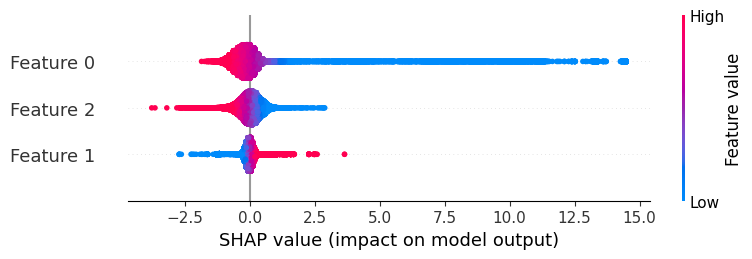

In [30]:
import shap

# Train the Logistic Regression model on PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# SHAP analysis to understand feature impact
explainer = shap.Explainer(model_pca, X_train_pca)
shap_values = explainer(X_train_pca)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_train_pca)

In [31]:
# A DataFrame to map PCA components to original sensor names Mapping the sensore to the Features


sensor_names = X_train.columns  # Get original sensor names
pca_loadings = pd.DataFrame(pca.components_.T, index=sensor_names, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display absolute values to see most impactful sensors
pca_loadings_abs = pca_loadings.abs()

# Get top contributing sensors for each principal component
top_sensors_per_pc = pca_loadings_abs.apply(lambda x: x.nlargest(3).index.tolist(), axis=0)

print("Top sensors contributing to each principal component:")
print(top_sensors_per_pc)

Top sensors contributing to each principal component:
         PC1        PC2        PC3
0  sensor_00  sensor_06  sensor_05
1  sensor_04  sensor_10  sensor_10
2  sensor_10  sensor_05  sensor_00


In [32]:
# Flatten the list of top sensors
# Instead of sum, use extend and chain from itertools to get a flat list of unique sensors
from itertools import chain

selected_sensors = list(set(chain.from_iterable(top_sensors_per_pc.values)))  # Get unique sensor names

# Filter dataset with only important sensors
X_train_selected = X_train[selected_sensors]
X_test_selected = X_test[selected_sensors]

# Train Logistic Regression again with selected features
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# Predict & Evaluate
y_pred_selected = model_selected.predict(X_test_selected)

print("Accuracy with selected features:", accuracy_score(y_test, y_pred_selected))
print(classification_report(y_test, y_pred_selected))

Accuracy with selected features: 0.9980268681780017
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23236
           1       0.97      0.95      0.96       584

    accuracy                           1.00     23820
   macro avg       0.99      0.97      0.98     23820
weighted avg       1.00      1.00      1.00     23820



In [33]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "SVM": SVC(kernel='rbf', probability=True)  # SVM with RBF kernel
}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train_selected, y_train)  # Train model
    y_pred = model.predict(X_test_selected)  # Predict on test set

    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression Performance:
Accuracy: 0.9980268681780017
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23236
           1       0.97      0.95      0.96       584

    accuracy                           1.00     23820
   macro avg       0.99      0.97      0.98     23820
weighted avg       1.00      1.00      1.00     23820


🔹 Random Forest Performance:
Accuracy: 0.9993702770780857
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23236
           1       0.98      0.99      0.99       584

    accuracy                           1.00     23820
   macro avg       0.99      0.99      0.99     23820
weighted avg       1.00      1.00      1.00     23820


🔹 XGBoost Performance:
Accuracy: 0.9990764063811923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23236
           1       0.98      0.98      0.98       584

    a

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 300],  # Number of trees
    'max_depth': [10, None],      # Tree depth
     #'min_samples_split': [2, 5, 10]   # Minimum samples per split
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold Cross-Validation
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose = 2)
rf_grid.fit(X_train_selected, y_train)

# Best parameters & accuracy
print("\n🔹 Best Random Forest Parameters:", rf_grid.best_params_)
print("Best RF Accuracy (CV Score):", rf_grid.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits

🔹 Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 100}
Best RF Accuracy (CV Score): 0.9994962117483824


In [35]:
from xgboost import XGBClassifier

# Define parameter grid
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],  # Step size shrinkage
    'n_estimators': [50, 100],    # Number of boosting rounds
    #'max_depth': [3, 6, 9]              # Maximum tree depth
}

# Initialize XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')

# Perform Grid Search with 5-fold Cross-Validation
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose =2)
xgb_grid.fit(X_train_selected, y_train)

# Best parameters & accuracy
print("\n🔹 Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost Accuracy (CV Score):", xgb_grid.best_score_)
# Extract the best XGBoost model from GridSearchCV
xgboost_model = xgb_grid.best_estimator_  # This saves the best tuned model

Fitting 3 folds for each of 4 candidates, totalling 12 fits

🔹 Best XGBoost Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
Best XGBoost Accuracy (CV Score): 0.9993702648507128


Number of detected anomalies: 240


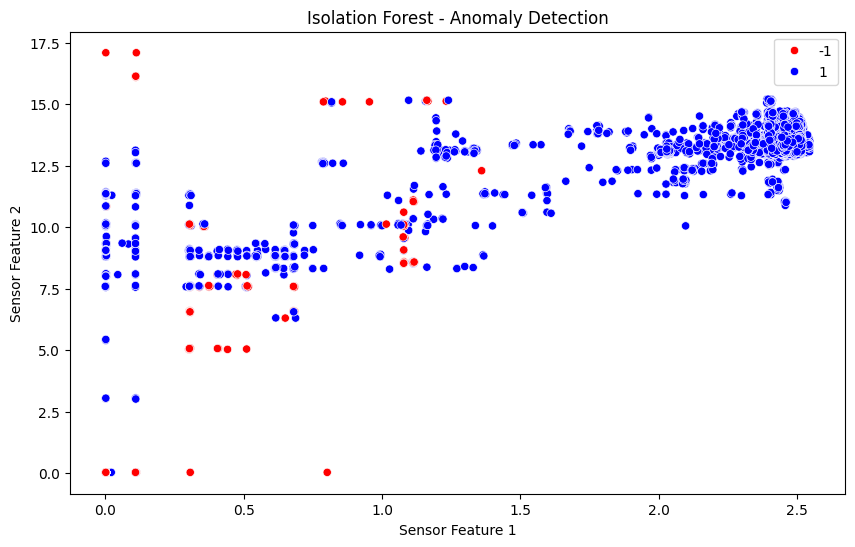

In [43]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model using only the selected sensor features from X_train_selected
iso_forest.fit(X_train_selected[selected_sensors])  # Only use the selected sensor features for training

# Predict anomalies (-1 = anomaly, 1 = normal)
# Only use the selected sensor features from X_test_selected for prediction
anomaly_labels = iso_forest.predict(X_test_selected[selected_sensors])

# Convert to DataFrame
X_test_selected.loc[:,'Anomaly'] = anomaly_labels

# Count anomalies detected
print("Number of detected anomalies:", (anomaly_labels == -1).sum())

# Visualize anomalies in a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_selected[selected_sensors[0]], y=X_test_selected[selected_sensors[1]], hue=anomaly_labels, palette={1: 'blue', -1: 'red'})  # Use selected_sensors for plotting
plt.title("Isolation Forest - Anomaly Detection")
plt.xlabel("Sensor Feature 1")
plt.ylabel("Sensor Feature 2")
plt.show()

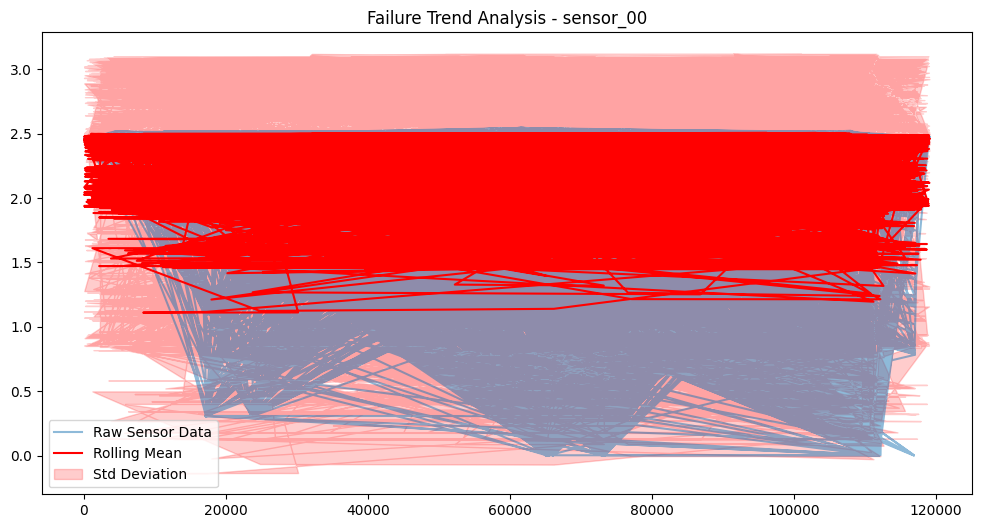

In [44]:
import numpy as np
import pandas as pd

# Add rolling mean & standard deviation for key sensors
window_size = 5  # Adjust for sensitivity
for sensor in selected_sensors:
    X_test_selected.loc[:, f"{sensor}_rolling_mean"] = X_test_selected[sensor].rolling(window=window_size).mean()
    X_test_selected.loc[:, f"{sensor}_rolling_std"] = X_test_selected[sensor].rolling(window=window_size).std()

# Visualize a key sensor drift over time
plt.figure(figsize=(12, 6))
plt.plot(X_test_selected.index, X_test_selected[selected_sensors[0]], label="Raw Sensor Data", alpha=0.5)
plt.plot(X_test_selected.index, X_test_selected[f"{selected_sensors[0]}_rolling_mean"], label="Rolling Mean", color='red')
plt.fill_between(X_test_selected.index,
                 X_test_selected[f"{selected_sensors[0]}_rolling_mean"] - X_test_selected[f"{selected_sensors[0]}_rolling_std"],
                 X_test_selected[f"{selected_sensors[0]}_rolling_mean"] + X_test_selected[f"{selected_sensors[0]}_rolling_std"],
                 color='red', alpha=0.2, label="Std Deviation")
plt.title(f"Failure Trend Analysis - {selected_sensors[0]}")
plt.legend()
plt.show()

In [45]:
# Define a risk threshold based on anomaly count
X_test_selected.loc[:,'Risk_Score'] = X_test_selected[selected_sensors].sum(axis=1)
risk_threshold = X_test_selected['Risk_Score'].quantile(0.95)  # Top 5% as high risk

X_test_selected.loc[:,'Maintenance_Alert'] = X_test_selected['Risk_Score'] > risk_threshold

# Display flagged sensors needing maintenance
high_risk_sensors = X_test_selected[X_test_selected['Maintenance_Alert']]
print("Equipment flagged for maintenance:", high_risk_sensors.shape[0])

Equipment flagged for maintenance: 1191


In [46]:
# Add failure event labels to the anomaly dataset
X_test_selected.loc[:,'Failure_Event'] = y_test.values  # Assuming y_test contains failure labels (0 or 1)

# Count anomalies that occurred before failures
anomalies_before_failure = X_test_selected[(X_test_selected['Anomaly'] == -1) & (X_test_selected['Failure_Event'] == 1)]

print("Anomalies detected before failure:", anomalies_before_failure.shape[0])
print("Percentage of failures flagged as anomalies:",
      (anomalies_before_failure.shape[0] / X_test_selected['Failure_Event'].sum()) * 100, "%")

Anomalies detected before failure: 145
Percentage of failures flagged as anomalies: 24.82876712328767 %


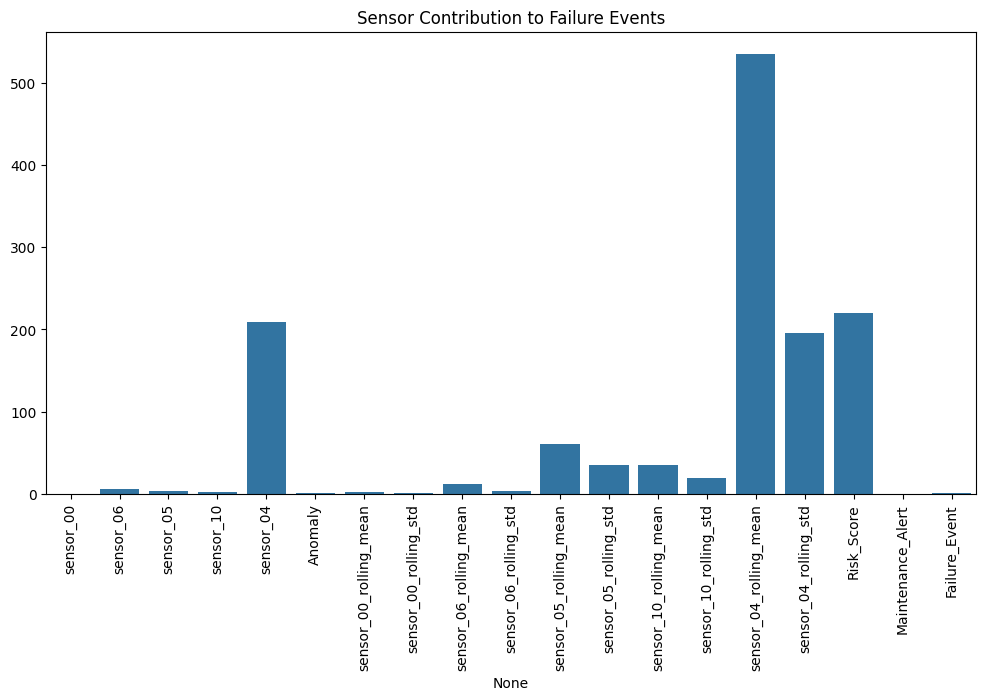

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average sensor values for flagged maintenance cases
sensor_means = X_test_selected[X_test_selected['Failure_Event'] == 1].mean()

# Plot sensor importance
plt.figure(figsize=(12,6))
sns.barplot(x=sensor_means.index, y=sensor_means.values)
plt.xticks(rotation=90)
plt.title("Sensor Contribution to Failure Events")
plt.show()

In [48]:
#Predictive Mainteince
new_data = X_test_selected.copy()  # Use test set as new data (for debugging)
# Ensure 'new_data' contains only the required sensor columns
new_data_selected = new_data[selected_sensors]

# Predict failure probabilities using the trained XGBoost model
new_data['Failure_Risk'] = xgboost_model.predict_proba(new_data_selected)[:,1]

# Flag equipment for maintenance if failure risk > 80%
new_data['Maintenance_Alert'] = new_data['Failure_Risk'] > 0.8

# Count flagged equipment
print("Equipment flagged for maintenance:", new_data['Maintenance_Alert'].sum())

Equipment flagged for maintenance: 571


In [49]:
#Predictive Mainteince
new_data = X_test_selected.copy()  # Use test set as new data (for debugging)
# Ensure 'new_data' contains only the required sensor columns
new_data_selected = new_data[selected_sensors]

# Predict failure probabilities using the trained XGBoost model
new_data['Failure_Risk'] = xgboost_model.predict_proba(new_data_selected)[:,1]

# Flag equipment for maintenance if failure risk > 80%
new_data['Maintenance_Alert'] = new_data['Failure_Risk'] > 0.8

# Count flagged equipment
num_flagged = new_data['Maintenance_Alert'].sum()
total_equipment = len(new_data)  # Get total number of equipment
percentage_flagged = (num_flagged / total_equipment) * 100

# Print results
print("Equipment flagged for maintenance:", num_flagged)
print("Percentage of equipment flagged for maintenance: {:.2f}%".format(percentage_flagged))

Equipment flagged for maintenance: 571
Percentage of equipment flagged for maintenance: 2.40%
